In [3]:
from sklearn import svm
from keras.models import Model
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from edu.javerianacali.process_images import ProcessImages
import tabulate 

directorio = "/data/maestria/maestriasinpro/proyectodegrado/pujc-advocato-filter-project-mngr/assets"


2024-06-01 15:00:21.196219: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-01 15:00:21.200946: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-01 15:00:21.268868: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-01 15:00:22.705200: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# AUMENTO DE DATOS

In [ ]:

from edu.javerianacali.data_aumentation import DataAugmentation

DataAugmentation().augment_images(directorio+'/poquitas'

)

# PROCESAR INAGENES PARA MODELOS DE APRENDIZAJE SUPERVISADO

In [ ]:
path=directorio+'/poquitas'
archivos = os.listdir(path)
for archivo in archivos:
    if archivo.endswith((".jpg", ".JPG", ".jpeg", ".png")):
        ruta_imagen = os.path.join(path, archivo)
        titulos = ["Ori", "SinTex","Sinsomb", archivo]
        imagenes = ProcessImages().procesar_imagen(ruta_imagen,archivo,directorio,200,200)
        ProcessImages().mostrar_imagenes(titulos, imagenes)



In [4]:


from edu.javerianacali.create_dataset import CreateDataSet
create_dataset = CreateDataSet().create_dataset(directorio)
features, labels = create_dataset[0], create_dataset[1]


['fil_sano_tomada6.jpeg', 'fil_Heilipus (525).jpg', 'fil_aug_Sano_P14_140 degrees_0_3610.jpg', 'fil_sano (65).png', 'fil_aug_Sano_P15_50 degrees_0_6193.jpg', 'fil_aug_Sano_P18_40 degrees_0_438.jpg', 'fil_Elfresno164_003(1).png', 'fil_aug_Sano_P18_130 degrees_0_6129.jpg', 'fil_Heilipus (539).jpg', 'fil_sano(68).jpg', 'fil_Heilipus (105).jpg', 'fil_sano_tomada22.jpeg', 'fil_aug_Sano_P8_100 degrees_0_929.jpg', 'fil_Heilipus (84).jpg', 'fil_aug_Sano_P18_40 degrees_0_3686.jpg', 'fil_aug_Sano_P6_10 degrees_0_5505.jpg', 'fil_Heilipus (342).jpg', 'fil_aug_Sano_P12_20 degrees_0_8164.jpg', 'fil_Sano_P13_60 degrees.JPG', 'fil_Sano_P18_100 degrees.JPG', 'fil_aug_Sano_P5_60 degrees_0_9466.jpg', 'fil_aug_Sano_P14_140 degrees_0_3894.jpg', 'fil_Elfresno010_002.png', 'fil_Heilipus (277).jpg', 'fil_Heilipus (44).jpg', 'fil_aug_Sano_P19_50 degrees_0_1113.jpg', 'fil_Heilipus (361).jpg', 'fil_aug_Sano_P13_180 degrees_0_5495.jpg', 'fil_Heilipus (262).jpg', 'fil_aug_Sano_P16_60 degrees_0_8831.jpg', 'fil_Sano

In [5]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Convertir la lista aplanada en un array de NumPy
X = np.array(features)
y = np.array(labels)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalizar los datos
    ('svm', svm.SVC(kernel='linear', probability=True))  
    
])
param_grid = {
    'svm__C': [0.1, 1, 10, 100], 
    'svm__kernel': ['linear', 'rbf'], 
    'svm__gamma': ['scale', 'auto']  
}
# Usar GridSearchCV para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Entrenar el modelo SVM usando GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Predecir etiquetas para el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Imprimir los mejores hiperparámetros
print(f"Mejores hiperparametros: {grid_search.best_params_}")

Accuracy: 0.88
Best hyperparameters: {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}


Support Vectors:
[[-1.22743543e+02 -2.34995574e+01]
 [-1.32091912e+02 -1.13340584e+01]
 [ 1.59237875e+02  1.99350889e+01]
 [-1.24990858e+02 -1.34249432e+01]
 [-1.08620547e+02  1.92790625e+01]
 [-1.17624655e+02 -3.70503327e+01]
 [-1.02313917e+02 -2.35472158e+00]
 [ 1.73534760e+02  3.32275746e+01]
 [-1.34956423e+02 -9.71976043e+00]
 [ 1.55299523e+02 -7.70728353e+00]
 [ 1.58894300e+02 -3.45145084e+00]
 [-1.20672462e+02  6.23759975e+00]
 [ 1.82437612e+02 -5.79443551e-01]
 [-7.97981332e+01  5.04947867e+01]
 [-7.96882120e+01  5.81924022e+01]
 [ 1.82786330e+02 -4.04111114e-02]
 [ 1.79196555e+02 -2.81147328e+00]
 [-1.05038598e+02 -1.99777916e+01]
 [-1.28660028e+02 -9.95403485e-01]
 [-1.21978502e+02 -1.96567276e+01]
 [-7.33554799e+01  5.95392955e+00]
 [ 1.86299429e+02 -3.33245321e+00]
 [-1.01726831e+02  3.59854859e+00]
 [-7.92783378e+01 -3.47841260e+00]
 [ 1.26484382e+02 -7.95102585e+00]
 [ 1.75503812e+02  3.74866556e+01]
 [-1.04482726e+02  6.25083605e+00]
 [-1.27747019e+02 -1.19427798e+01]
 [ 

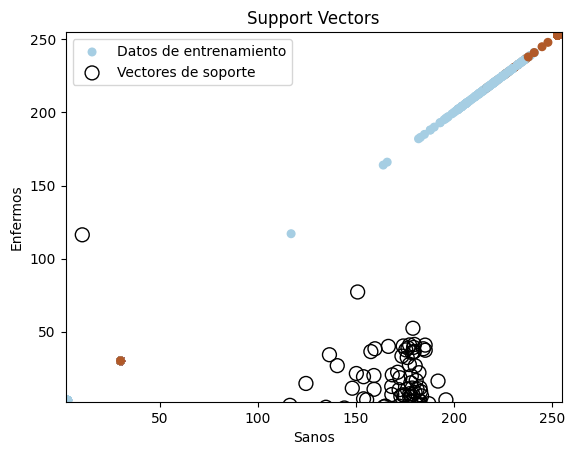

In [10]:
import matplotlib.pyplot as plt

# Asegúrate de que estas variables ya están definidas en tu código:
# X_train: matriz de características de entrenamiento
# y_train: etiquetas de entrenamiento
# model: tu modelo SVM ya entrenado

# Obtener los vectores de soporte del mejor modelo
support_vectors = best_model.named_steps['svm'].support_vectors_
print(f"Support Vectors:\n{support_vectors}")

# Graficar los datos de entrenamiento
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired, label='Datos de entrenamiento')

# Graficar los vectores de soporte
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], facecolors='none', edgecolors='k', s=100, label='Vectores de soporte')

# Ajustar los límites de los ejes para mejor visualización (ajusta según tu rango de datos)
plt.xlim(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1)
plt.ylim(X_train[:, 1].min() - 1, X_train[:, 1].max() + 1)

# Añadir título y etiquetas de los ejes
plt.title("Support Vectors")
plt.xlabel("Sanos")
plt.ylabel("Enfermos")

# Añadir leyenda para mayor claridad
plt.legend()



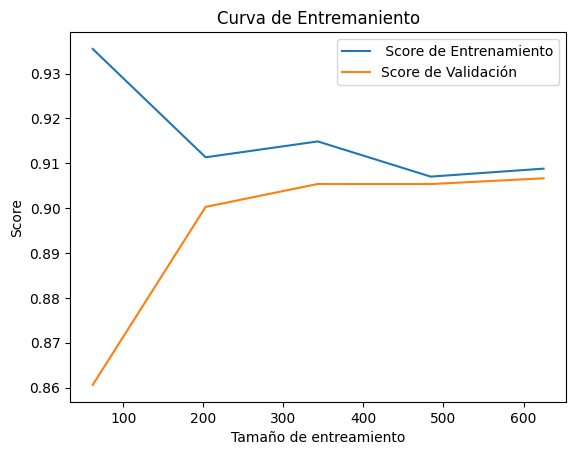

In [12]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(best_model, X_train.reshape(len(X_train), -1), y_train, cv=5)

plt.plot(train_sizes, train_scores.mean(axis=1), label=' Score de Entrenamiento')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Score de Validación')
plt.xlabel('Tamaño de entreamiento')
plt.ylabel('Score')
plt.title('Curva de Entremaniento')
plt.legend()
plt.show()

Confusion Matrix
[[148  25]
 [ 16 147]]


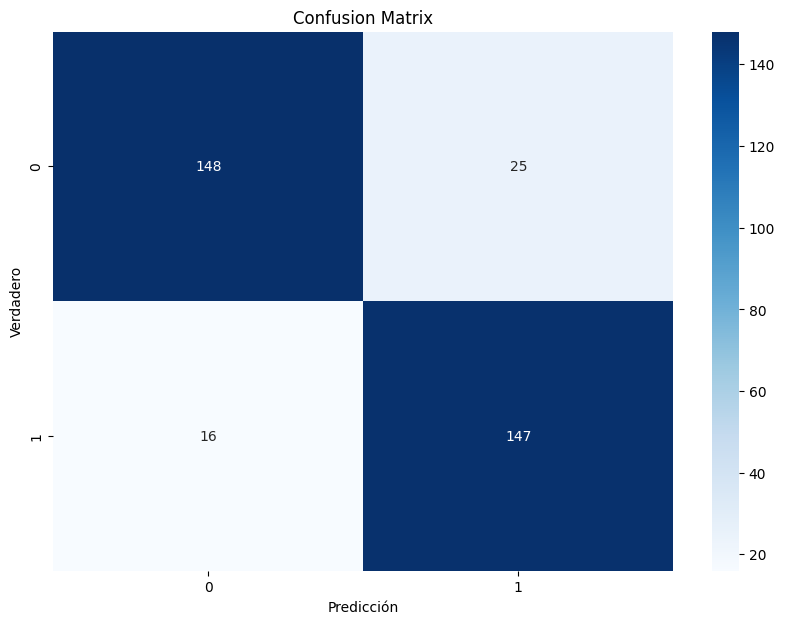

Classification Report
{'0': {'precision': 0.9024390243902439, 'recall': 0.8554913294797688, 'f1-score': 0.8783382789317508, 'support': 173.0}, '1': {'precision': 0.8546511627906976, 'recall': 0.901840490797546, 'f1-score': 0.8776119402985074, 'support': 163.0}, 'accuracy': 0.8779761904761905, 'macro avg': {'precision': 0.8785450935904708, 'recall': 0.8786659101386574, 'f1-score': 0.8779751096151291, 'support': 336.0}, 'weighted avg': {'precision': 0.8792562224833211, 'recall': 0.8779761904761905, 'f1-score': 0.8779859182257429, 'support': 336.0}}


,precision,recall,f1-score,support
0,0.902439,0.855491,0.878338,173.000000
1,0.854651,0.901840,0.877612,163.000000
accuracy,0.877976,0.877976,0.877976,0.877976
macro avg,0.878545,0.878666,0.877975,336.000000
weighted avg,0.879256,0.877976,0.877986,336.000000


In [13]:

# Matriz de confusión
print("Confusion Matrix")
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

print(cm)
# Visualización de la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Confusion Matrix')
plt.show()


# Informe de clasificación

report = classification_report(y_test, y_pred, output_dict=True)
print("Classification Report")
print(report)
report_df = pd.DataFrame(report).transpose()
report_df.to_csv('classification_report_cnn.csv', index=True)

cm = sns.light_palette("blue", as_cmap=True)
styled_df = report_df.style.background_gradient(cmap=cm)
display(styled_df)


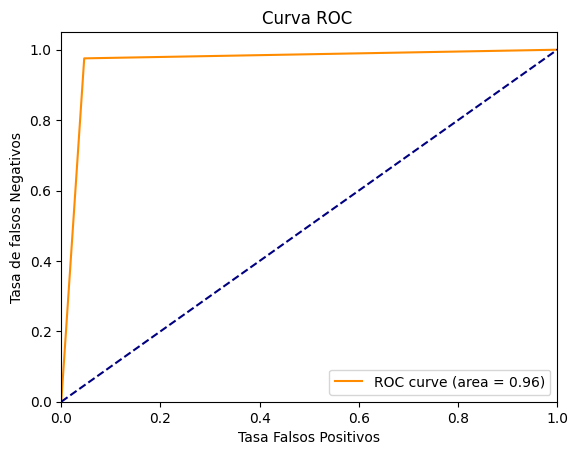

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
# Si y_pred es unidimensional, no necesitas indexarlo con [:, 1]
if y_pred.ndim == 1:
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Visualización de la curva ROC
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa Falsos Positivos')
    plt.ylabel('Tasa de falsos Negativos')
    plt.title('Curva ROC ')
    plt.legend(loc="lower right")
    plt.show()